In [1]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')
model.to('cuda')

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [1]:
import mlflow
import mlflow.sklearn
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Databricks MLflow 추적 서버 URI 설정
databricks_uri = "databricks"  # Databricks 워크스페이스의 MLflow URI
mlflow.set_tracking_uri(databricks_uri)

# MLflow 추적 서버 URI 설정 (Azure Databricks 내에서 자동으로 설정될 수 있음)
# mlflow.set_tracking_uri('<Azure Databricks MLflow URI>')

# MLflow 실험 설정
mlflow.set_experiment('/Users/20182562@oasis.inje.ac.kr/IrisClassification')

# 실험 시작
with mlflow.start_run():
    # 데이터 로드 및 분할
    iris = load_iris()
    X = iris.data
    y = iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 모델 생성 및 훈련
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)

    # 예측 및 정확도 계산
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)

    # 결과 출력
    print(f"정확도: {accuracy}")

    # 파라미터, 메트릭스, 모델을 MLflow에 기록
    mlflow.log_param("test_size", 0.2)
    mlflow.log_param("random_state", 42)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.sklearn.log_model(clf, "model")



2023/12/27 21:53:42 INFO mlflow.tracking.fluent: Experiment with name '/Users/20182562@oasis.inje.ac.kr/IrisClassification' does not exist. Creating a new experiment.


정확도: 1.0


2023/12/27 21:53:44 WARNING mlflow.models.model: Model logged without a signature. Signatures will be required for upcoming model registry features as they validate model inputs and denote the expected schema of model outputs. Please visit https://www.mlflow.org/docs/2.9.2/models.html#set-signature-on-logged-model for instructions on setting a model signature on your logged model.
/home/stonedev/anaconda3/envs/dev_torch/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
import mlflow
import mlflow.pytorch
from ultralytics import YOLO
model = YOLO('yolov8n.pt')

# MLflow 추적 서버 URI 설정 (Azure Databricks 내에서 자동으로 설정될 수 있음)
databricks_uri = "databricks"  # Databricks 워크스페이스의 MLflow URI
mlflow.set_tracking_uri(databricks_uri)

# MLflow 실험 설정
mlflow.set_experiment('/Users/20182562@oasis.inje.ac.kr/YOLOv8CustomTraining')

# 실험 시작
with mlflow.start_run():
    # YOLOv8 커스텀 데이터 학습 설정
    config_path = '<path_to_your_custom_config>'  # YOLOv8 커스텀 설정 파일 경로
    data_path = '<path_to_your_custom_data>'     # 데이터셋 경로
    epochs = 100                                # 에포크 수
    batch_size = 32                             # 배치 사이즈

    # 학습 시작
    results = train(config_path, data_path, epochs=epochs, batch_size=batch_size)

    # 학습 파라미터 기록
    mlflow.log_param("config_path", config_path)
    mlflow.log_param("data_path", data_path)
    mlflow.log_param("epochs", epochs)
    mlflow.log_param("batch_size", batch_size)

    # 학습 메트릭스 기록 (예시: 손실, 정확도 등)
    # results 객체에서 필요한 메트릭스 정보를 추출하여 기록합니다.
    # 이 부분은 YOLOv8의 train 함수 반환값에 따라 달라질 수 있습니다.
    mlflow.log_metrics({"loss": results.loss, "accuracy": results.accuracy})

    # 학습된 모델 기록
    mlflow.pytorch.log_model(results.model, "model")


In [2]:
import mlflow
import re,os
# Databricks MLflow 추적 서버 URI 설정
databricks_uri = "databricks"  # Databricks 워크스페이스의 MLflow URI
# mlflow.set_tracking_uri(databricks_uri)
os.environ['MLFLOW_TRACKING_URI'] = databricks_uri
# # Set the experiment path
mlflow.set_experiment("/Users/20182562@oasis.inje.ac.kr/Yolov")

def on_fit_epoch_end(trainer):
    if mlflow:
        metrics_dict = {f"{re.sub('[()]', '', k)}": float(v) for k, v in trainer.metrics.items()}
        mlflow.log_metrics(metrics=metrics_dict, step=trainer.epoch)

# 실험 세션 생성
try: 
     with mlflow.start_run():
          model.add_callback("on_fit_epoch_end",on_fit_epoch_end)
          result = model.train(data='../BP_OB_Model/Food_OD.yaml', epochs=100, patience=30, batch=32, imgsz=416)
          mlflow.pytorch.log_model(result.model, "model")
	
except mlflow.exceptions.MlflowException as e:
    print(f"An Mlflow error occurred: {str(e)}")

2023/12/27 22:17:28 INFO mlflow.tracking.fluent: Experiment with name '/Users/20182562@oasis.inje.ac.kr/Yolov' does not exist. Creating a new experiment.


New https://pypi.org/project/ultralytics/8.0.230 available 😃 Update with 'pip install -U ultralytics'
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=../BP_OB_Model/Food_OD.yaml, epochs=100, time=None, patience=30, batch=32, imgsz=416, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, 

train: Scanning /data/BP/BP_OB_Model/Train.cache... 41065 images, 0 backgrounds, 37 corrupt: 100%|██████████| 41101/41101 [00:00<?, ?it/s]

train: WARNING ⚠️ /data/BP/BP_OB_Model/Train/Img_000_0097.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /data/BP/BP_OB_Model/Train/Img_000_0233.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /data/BP/BP_OB_Model/Train/Img_001_0181.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /data/BP/BP_OB_Model/Train/Img_001_0286.jpg: ignoring corrupt image/label: invalid image format GIF
train: WARNING ⚠️ /data/BP/BP_OB_Model/Train/Img_001_0355.jpg: ignoring corrupt image/label: invalid image format GIF
train: WARNING ⚠️ /data/BP/BP_OB_Model/Train/Img_001_0362.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /data/BP/BP_OB_Model/Train/Img_002_0586.JPG: corrupt JPEG restored and saved
train: WARNING ⚠️ /data/BP/BP_OB_Model/Train/Img_002_0879.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /data/BP/BP_OB_Model/Train/Img_004_0412.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /data/BP/BP_OB_Model/Train/Img_004_0419.jpg: corrupt JPEG restored and saved
trai


val: Scanning /data/BP/BP_OB_Model/Val.cache... 10194 images, 0 backgrounds, 6 corrupt: 100%|██████████| 10199/10199 [00:00<?, ?it/s]

val: WARNING ⚠️ /data/BP/BP_OB_Model/Val/Img_001_0247.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /data/BP/BP_OB_Model/Val/Img_001_0311.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /data/BP/BP_OB_Model/Val/Img_004_0508.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /data/BP/BP_OB_Model/Val/Img_005_0117.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /data/BP/BP_OB_Model/Val/Img_006_0293.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /data/BP/BP_OB_Model/Val/Img_007_0430.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /data/BP/BP_OB_Model/Val/Img_007_0564.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /data/BP/BP_OB_Model/Val/Img_007_0580.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /data/BP/BP_OB_Model/Val/Img_012_0161.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /data/BP/BP_OB_Model/Val/Img_013_0245.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /data/BP/BP_OB_Model/Val/Img_019_0193.jpg: corrupt JPEG restored and saved


libpng warning: iCCP: known incorrect sRGB profile


Plotting labels to runs/detect/train8/labels.jpg... 


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)


2023/12/27 22:17:35 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2023/12/27 22:17:35 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2023/12/27 22:17:36 INFO mlflow.tracking.fluent: Autologging successfully enabled for transformers.


MLflow: logging run_id(56862881340a4f75a48746c698e91486) to databricks
MLflow: disable with 'yolo settings mlflow=False'
100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.58G      1.408      5.116      1.592         82        416:   2%|▏         | 30/1284 [00:03<02:24,  8.69it/s]libpng warning: iCCP: known incorrect sRGB profile
      1/100      2.58G      1.398       5.11      1.586         84        416:   3%|▎         | 38/1284 [00:04<02:23,  8.66it/s]libpng warning: iCCP: known incorrect sRGB profile
      1/100      2.58G       1.38      5.104      1.576         80        416:   4%|▍         | 51/1284 [00:06<02:22,  8.67it/s]libpng warning: iCCP: known incorrect sRGB profile
      1/100      2.58G      1.354      5.091       1.56         74        416:   7%|▋         | 86/1284 [00:10<02:17,  8.69it/s]libpng warning: iCCP: known incorrect sRGB profile
      1/100      2.58G      1.328      5.078      1.542         91        416:   9%|▉         | 119/1284 [00:14<02:14,  8.68it/s]libpng warning: iCCP: known incorrect sRGB profile
      1/100      2.58G      1.296      5.068      1.521         77        416:  12%|█▏        | 157/1284

                   all      10193      10193      0.526      0.145     0.0924     0.0542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.61G      1.262      3.311      1.472         93        416:  12%|█▏        | 151/1284 [00:17<02:10,  8.66it/s]libpng warning: iCCP: known incorrect sRGB profile
      2/100      2.61G      1.262      3.307      1.471         86        416:  12%|█▏        | 156/1284 [00:18<02:10,  8.66it/s]libpng warning: iCCP: known incorrect sRGB profile
      2/100      2.61G      1.266      3.289      1.473         85        416:  14%|█▍        | 186/1284 [00:21<02:06,  8.65it/s]libpng warning: iCCP: known incorrect sRGB profile
      2/100      2.61G      1.266      3.272      1.472         75        416:  17%|█▋        | 220/1284 [00:25<02:03,  8.64it/s]libpng warning: iCCP: known incorrect sRGB profile
      2/100      2.61G      1.265      3.263      1.473         78        416:  18%|█▊        | 231/1284 [00:26<02:01,  8.66it/s]libpng warning: iCCP: known incorrect sRGB profile
      2/100      2.61G      1.265      3.261      1.473         86        416:  18%|█▊        | 237/

                   all      10193      10193      0.471      0.248       0.19      0.118

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100       2.6G      1.232      2.767      1.424         76        416:   2%|▏         | 32/1284 [00:03<02:20,  8.89it/s]libpng warning: iCCP: known incorrect sRGB profile
      3/100       2.6G      1.238      2.764       1.43         85        416:   3%|▎         | 34/1284 [00:03<02:20,  8.90it/s]libpng warning: iCCP: known incorrect sRGB profile
      3/100       2.6G      1.231      2.761      1.425         86        416:   4%|▎         | 46/1284 [00:05<02:19,  8.90it/s]libpng warning: iCCP: known incorrect sRGB profile
      3/100       2.6G      1.238      2.763       1.43         79        416:   4%|▍         | 51/1284 [00:05<02:16,  9.03it/s]libpng warning: iCCP: known incorrect sRGB profile
      3/100       2.6G      1.256      2.766      1.438         78        416:   6%|▌         | 75/1284 [00:08<02:13,  9.03it/s]libpng warning: iCCP: known incorrect sRGB profile
      3/100       2.6G      1.261      2.773      1.444         83        416:   7%|▋         | 85/1284 [

                   all      10193      10193      0.432      0.203      0.143     0.0863

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.62G      1.313      2.854      1.461         90        416:   2%|▏         | 20/1284 [00:02<02:22,  8.87it/s]libpng warning: iCCP: known incorrect sRGB profile
      4/100      2.62G       1.32      2.843      1.463         87        416:   8%|▊         | 108/1284 [00:12<02:12,  8.90it/s]libpng warning: iCCP: known incorrect sRGB profile
      4/100      2.62G      1.314      2.826      1.459         92        416:  16%|█▌        | 202/1284 [00:22<02:01,  8.92it/s]libpng warning: iCCP: known incorrect sRGB profile
      4/100      2.62G      1.315      2.823       1.46         86        416:  16%|█▋        | 209/1284 [00:23<01:59,  9.02it/s]libpng warning: iCCP: known incorrect sRGB profile
      4/100      2.62G      1.315      2.822      1.459         85        416:  17%|█▋        | 216/1284 [00:24<01:59,  8.91it/s]libpng warning: iCCP: known incorrect sRGB profile
      4/100      2.62G      1.315      2.818      1.459         78        416:  18%|█▊        | 237/1

                   all      10193      10193      0.492      0.294      0.246       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.61G      1.255      2.465       1.42         85        416:   3%|▎         | 40/1284 [00:04<02:20,  8.88it/s]libpng warning: iCCP: known incorrect sRGB profile
      5/100      2.61G      1.256      2.476      1.412         88        416:   5%|▌         | 69/1284 [00:07<02:15,  8.99it/s]libpng warning: iCCP: known incorrect sRGB profile
      5/100      2.61G      1.248      2.453      1.408         90        416:  15%|█▍        | 189/1284 [00:21<02:01,  9.00it/s]libpng warning: iCCP: known incorrect sRGB profile
      5/100      2.61G      1.251      2.453      1.411         76        416:  19%|█▊        | 238/1284 [00:26<01:57,  8.87it/s]libpng warning: iCCP: known incorrect sRGB profile
      5/100      2.61G       1.25      2.456      1.411         87        416:  20%|█▉        | 253/1284 [00:28<01:54,  8.98it/s]libpng warning: iCCP: known incorrect sRGB profile
      5/100      2.61G      1.251      2.455      1.411         81        416:  20%|██        | 258/12

                   all      10193      10193       0.47      0.338      0.315        0.2

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.53G       1.27       2.37      1.418         87        416:   0%|          | 3/1284 [00:00<02:23,  8.95it/s]libpng warning: iCCP: known incorrect sRGB profile
      6/100       2.6G      1.222      2.251      1.393         87        416:  15%|█▍        | 191/1284 [00:21<02:01,  9.03it/s]libpng warning: iCCP: known incorrect sRGB profile
      6/100       2.6G      1.222      2.252      1.393         85        416:  15%|█▌        | 194/1284 [00:21<02:02,  8.91it/s]libpng warning: iCCP: known incorrect sRGB profile
      6/100       2.6G      1.221      2.253      1.391         76        416:  21%|██        | 272/1284 [00:30<01:53,  8.91it/s]libpng warning: iCCP: known incorrect sRGB profile
      6/100       2.6G      1.221      2.253      1.391         92        416:  21%|██▏       | 274/1284 [00:30<01:53,  8.90it/s]libpng warning: iCCP: known incorrect sRGB profile
      6/100       2.6G      1.222      2.253       1.39         90        416:  23%|██▎       | 299/12

                   all      10193      10193      0.427      0.364      0.325      0.203

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       2.6G      1.193      2.134      1.361         93        416:   4%|▍         | 53/1284 [00:05<02:16,  9.01it/s]libpng warning: iCCP: known incorrect sRGB profile
      7/100       2.6G      1.197      2.131      1.371         86        416:  16%|█▌        | 206/1284 [00:23<02:01,  8.87it/s]libpng warning: iCCP: known incorrect sRGB profile
      7/100       2.6G      1.196       2.13      1.371         82        416:  16%|█▌        | 208/1284 [00:23<02:01,  8.88it/s]libpng warning: iCCP: known incorrect sRGB profile
      7/100       2.6G      1.195      2.126      1.369         80        416:  19%|█▊        | 240/1284 [00:26<01:57,  8.88it/s]libpng warning: iCCP: known incorrect sRGB profile
      7/100       2.6G      1.194       2.12      1.368         79        416:  24%|██▍       | 313/1284 [00:35<01:48,  8.98it/s]libpng warning: iCCP: known incorrect sRGB profile
      7/100       2.6G      1.193      2.124      1.369         77        416:  27%|██▋       | 341/1

                   all      10193      10193      0.456      0.402      0.388      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.59G      1.219      2.046      1.364         87        416:   1%|          | 16/1284 [00:01<02:22,  8.90it/s]libpng warning: iCCP: known incorrect sRGB profile
      8/100      2.59G      1.204      2.061      1.367         79        416:   2%|▏         | 26/1284 [00:02<02:21,  8.91it/s]libpng warning: iCCP: known incorrect sRGB profile
      8/100      2.59G      1.202      2.063      1.369         83        416:   3%|▎         | 33/1284 [00:03<02:19,  8.96it/s]libpng warning: iCCP: known incorrect sRGB profile
      8/100      2.59G      1.199      2.045      1.369         76        416:   4%|▍         | 50/1284 [00:05<02:19,  8.87it/s]libpng warning: iCCP: known incorrect sRGB profile
      8/100      2.59G      1.191      2.058      1.369         89        416:  10%|▉         | 128/1284 [00:14<02:10,  8.86it/s]libpng warning: iCCP: known incorrect sRGB profile
      8/100      2.59G      1.187      2.047      1.365         83        416:  14%|█▍        | 178/1284

                   all      10193      10193      0.487      0.436      0.419      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.59G      1.176      1.975      1.349         80        416:   3%|▎         | 40/1284 [00:04<02:20,  8.87it/s]libpng warning: iCCP: known incorrect sRGB profile
      9/100      2.59G      1.175      1.986      1.351         86        416:   4%|▍         | 50/1284 [00:05<02:18,  8.90it/s]libpng warning: iCCP: known incorrect sRGB profile
      9/100      2.59G      1.172      1.997      1.354         89        416:   6%|▋         | 81/1284 [00:09<02:13,  9.04it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
      9/100      2.59G      1.166      1.987      1.353         75        416:  10%|▉         | 124/1284 [00:13<02:10,  8.91it/s]libpng warning: iCCP: known incorrect sRGB profile
      9/100      2.59G      1.168      1.981      1.354         84        416:  12%|█▏        | 157/1284 [00:17<02:04,  9.05it/s]libpng warning: iCCP: known incorrect sRGB profile
      9/100      2.59G      1.171      1.978      1.

                   all      10193      10193      0.526      0.438      0.434      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.59G      1.123      1.952      1.307         86        416:   1%|          | 13/1284 [00:01<02:22,  8.92it/s]libpng warning: iCCP: known incorrect sRGB profile
     10/100      2.59G      1.135      1.916      1.326         88        416:   3%|▎         | 34/1284 [00:03<02:20,  8.89it/s]libpng warning: iCCP: known incorrect sRGB profile
     10/100      2.59G      1.141      1.912      1.334         95        416:   5%|▍         | 63/1284 [00:07<02:15,  9.00it/s]libpng warning: iCCP: known incorrect sRGB profile
     10/100      2.59G      1.162      1.926      1.346         72        416:  15%|█▍        | 187/1284 [00:21<02:01,  9.01it/s]libpng warning: iCCP: known incorrect sRGB profile
     10/100      2.59G      1.164      1.922      1.347         84        416:  16%|█▌        | 206/1284 [00:23<02:01,  8.87it/s]libpng warning: iCCP: known incorrect sRGB profile
     10/100      2.59G      1.165       1.93      1.348         87        416:  19%|█▊        | 239/128

FileNotFoundError: Caught FileNotFoundError in DataLoader worker process 3.
Original Traceback (most recent call last):
  File "/home/stonedev/anaconda3/envs/dev_torch/lib/python3.11/site-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
           ^^^^^^^^^^^^^^^^^^^^
  File "/home/stonedev/anaconda3/envs/dev_torch/lib/python3.11/site-packages/torch/utils/data/_utils/fetch.py", line 51, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/stonedev/anaconda3/envs/dev_torch/lib/python3.11/site-packages/torch/utils/data/_utils/fetch.py", line 51, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
            ~~~~~~~~~~~~^^^^^
  File "/home/stonedev/anaconda3/envs/dev_torch/lib/python3.11/site-packages/ultralytics/data/base.py", line 248, in __getitem__
    return self.transforms(self.get_image_and_label(index))
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/stonedev/anaconda3/envs/dev_torch/lib/python3.11/site-packages/ultralytics/data/base.py", line 254, in get_image_and_label
    label['img'], label['ori_shape'], label['resized_shape'] = self.load_image(index)
                                                               ^^^^^^^^^^^^^^^^^^^^^^
  File "/home/stonedev/anaconda3/envs/dev_torch/lib/python3.11/site-packages/ultralytics/data/base.py", line 158, in load_image
    raise FileNotFoundError(f'Image Not Found {f}')
FileNotFoundError: Image Not Found /data/BP/BP_OB_Model/Train/Img_012_0255.jpg


In [1]:
from ultralytics import YOLO
model = YOLO("../BP_OB_Model/runs/detect/train11/weights/best.pt")
result = model.predict("/data/BP/images (4).jpg")

boxes = result[0].boxes
pred_list = {}
if len(boxes.conf) > 0:
    for index,box in enumerate(boxes):
        # 신뢰도가 가장 높은 객체를 찾음
        max_conf_index = box.conf.argmax()
        highest_confidence = box.conf[max_conf_index].item()
        class_id = box.cls[max_conf_index].item()

        # 클래스 ID를 사용하여 음식 이름 찾기
        food_name = result[0].names[class_id]
        pred_list[f'item{index}']={"Food_name" : food_name,
                                 "highest_confidence":highest_confidence}
        print(pred_list)       
else:
    print("탐지된 객체가 없습니다.")


image 1/1 /data/BP/images (4).jpg: 320x416 1 홍어무침, 1 제육볶음, 82.6ms
Speed: 0.5ms preprocess, 82.6ms inference, 74.4ms postprocess per image at shape (1, 3, 320, 416)
{'item0': {'Food_name': '홍어무침', 'highest_confidence': 0.31527748703956604}}
{'item0': {'Food_name': '홍어무침', 'highest_confidence': 0.31527748703956604}, 'item1': {'Food_name': '제육볶음', 'highest_confidence': 0.2649374008178711}}


### -----

In [32]:
import requests
import json
from datetime import datetime
import hmac, hashlib
from pytz import timezone
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import os
import json
import io

def img_resize(img):
    try:
        # 이미지를 열고 크기 가져오기
        with Image.open(img) as img:
            width, height = img.size
            print("@hello14 :", width, height)

            # 최소 및 최대 크기 정의
            minWidth, maxWidth = (720, 2560) if width > height else (720, 1440)
            minHeight, maxHeight = (1080, 1440) if width > height else (1080, 2560)
            print("@hello14 :", minWidth, minHeight, maxWidth, maxHeight)
            if minWidth <= width <= maxWidth and minHeight <= height <= maxHeight:
                print("Image meets size requirements. No resizing needed.")
                img_byte_arr = io.BytesIO()
                img.save(img_byte_arr, format='JPEG')
                return img_byte_arr.getvalue()

            # 이미지 크기 조정
            newWidth, newHeight = width, height
            if width < minWidth or height < minHeight:
                # 이미지 확대
                if width / height > 1:
                    # 넓은 이미지
                    newHeight = max(height, minHeight)
                    newWidth = round(newHeight * (width / height))
                    if newWidth < minWidth:
                        newWidth = minWidth
                        newHeight = round(newWidth / (width / height))
                else:
                    # 높은 이미지
                    newWidth = max(width, minWidth)
                    newHeight = round(newWidth / (width / height))
                    if newHeight < minHeight:
                        newHeight = minHeight
                        newWidth = round(newHeight * (width / height))
            elif width > maxWidth or height > maxHeight:
                # 이미지 축소
                if width / height > 1:
                    # 넓은 이미지
                    newWidth = min(width, maxWidth)
                    newHeight = round(newWidth / (width / height))
                    if newHeight > maxHeight:
                        newHeight = maxHeight
                        newWidth = round(newHeight * (width / height))
                else:
                    # 높은 이미지
                    newHeight = min(height, maxHeight)
                    newWidth = round(newHeight / (width / height))
                    if newWidth > maxWidth:
                        newWidth = maxWidth
                        newHeight = round(newWidth / (width / height))

            # 조정된 크기 출력 및 이미지 크기 조정
            print("@hello15 : Resized Image Size:", newWidth, newHeight)
            resized_img = img.resize((newWidth, newHeight))
            img_byte_arr = io.BytesIO()
            resized_img.save(img_byte_arr, format='JPEG')
            return img_byte_arr.getvalue()
    except Exception as error:
        print("Error resizing image:", error)
        return None

def get_secret(setting):
    BASE_DIR = "../BP_Api_File/"
    secret_file = os.path.join(BASE_DIR, 'secrets.json')
    try:
        with open(secret_file) as f:
            secrets = json.loads(f.read())
        return secrets[setting]
    except KeyError:
        print("Set the {} environment variable".format(setting))

def food_api(img):
    point_list = []
    food_api_result = {}
    # timestamp 생성
    timestamp = datetime.now(timezone("Asia/Seoul")).strftime("%Y%m%d%H%M%S%f")[:-3]
    # API키 분리
    BASE_DIR = "../BP_Api_File/"

    secret_file = os.path.join(BASE_DIR, 'secrets.json')
 
    client_id = get_secret("kt_client_id")
    client_secret = get_secret("kt_client_secret")

    # HMAC 기반 signature 생성
    signature = hmac.new(
        key=client_secret.encode("UTF-8"), msg= f"{client_id}:{timestamp}".encode("UTF-8"), digestmod=hashlib.sha256
    ).hexdigest()


    url = "https://aiapi.genielabs.ai/kt/vision/food"
    client_key = get_secret("kt_client_key")
    signature = signature
    timestamp = timestamp


    headers = {
        "Accept": "*/*",
        "x-client-key": client_key,
        "x-client-signature": signature,
        "x-auth-timestamp": timestamp
    }

    fields = {
        "flag": "ALL" # or "UNSELECTED" or "CALORIE" or "NATRIUM"
    }

    print("--------------",type(img))
    obj =  {'metadata': json.dumps(fields), 'media': img} # or "false"

    response = requests.post(url, headers=headers, files=obj)

    if response.ok:
        json_data = json.loads(response.text)
        code = json_data['code']
        data = json_data['data']
        print(f"Code: {code}")
        #.json 형식 출력
        # print(f"Data: {data}")
        for region_num in data[0]:
            food_api_result[region_num] = data[0][region_num]['prediction_top1']
            for point in data[0][region_num]['position']:
                if point['location_type'] == 'LEFT_TOP':
                    left_top = (int(point['x'].split('.')[0]), int(point['y'].split('.')[0]))
                else:
                    right_bottom = (int(point['x'].split('.')[0]), int(point['y'].split('.')[0]))
                
            point_list.append([left_top[0],left_top[1],right_bottom[0],right_bottom[1],data[0][region_num]['prediction_top1']['food_name'],data[0][region_num]['prediction_top1']['confidence']])
        print('='*20)
        print("@@@ food_api_result",food_api_result)
        return point_list
    else:
        print(f"Error: {response.status_code} - {response.text}")

@hello14 : 1080 1440
@hello14 : 720 1080 1440 2560
Image meets size requirements. No resizing needed.
<class 'bytes'>
-------------- <class 'bytes'>
Code: 200
@@@ food_api_result {'region_0': {'confidence': 0.78594, 'food_name': '치즈라면', 'food_code': 'D000169', 'food_cal': 595.0, 'food_nat': 2113.4, 'food_serving_size': 600.0, 'food_carbs': 80.0, 'food_protein': 16.8, 'food_fat': 23.0, 'food_sugar': 0.9, 'food_cholesterol': 103.67}, 'region_1': {'confidence': 0.22131813, 'food_name': '두부김치', 'food_code': 'D000270', 'food_cal': 288.21, 'food_nat': 989.69, 'food_serving_size': 250.0, 'food_carbs': 14.08, 'food_protein': 19.47, 'food_fat': 17.11, 'food_sugar': 1.49, 'food_cholesterol': 13.92}, 'region_2': {'confidence': 0.7496143, 'food_name': '떡만두국', 'food_code': 'D018162', 'food_cal': 666.99, 'food_nat': 1236.89, 'food_serving_size': 600.0, 'food_carbs': 92.83, 'food_protein': 21.18, 'food_fat': 23.44, 'food_sugar': 0.07, 'food_cholesterol': 67.95}}

0: 416x320 1 수제비, 10.2ms
Speed: 0.6ms

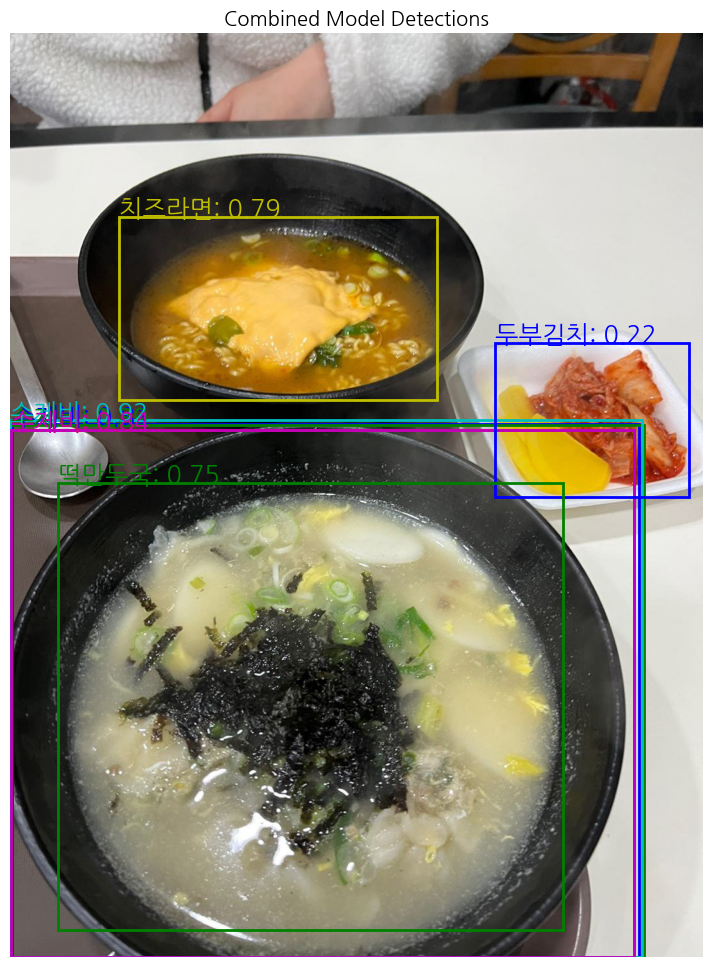

@@@all_boxes : [[tensor(0.0018), tensor(0.4232), tensor(0.9071), tensor(1.)], [tensor(0.), tensor(0.4241), tensor(0.9148), tensor(1.)], [tensor(0.0016), tensor(0.4289), tensor(0.9000), tensor(1.)], [tensor(0.), tensor(0.4190), tensor(0.9117), tensor(1.)], [tensor(0.0016), tensor(0.4289), tensor(0.9000), tensor(1.)], [0.1574074074074074, 0.1986111111111111, 0.6157407407407407, 0.3972222222222222], [0.6990740740740741, 0.3347222222222222, 0.9796296296296296, 0.5020833333333333], [0.06851851851851852, 0.48680555555555555, 0.7972222222222223, 0.9708333333333333]]
@@@box : 0
@@@box : 1
@@@box : 2
@@@box : 3


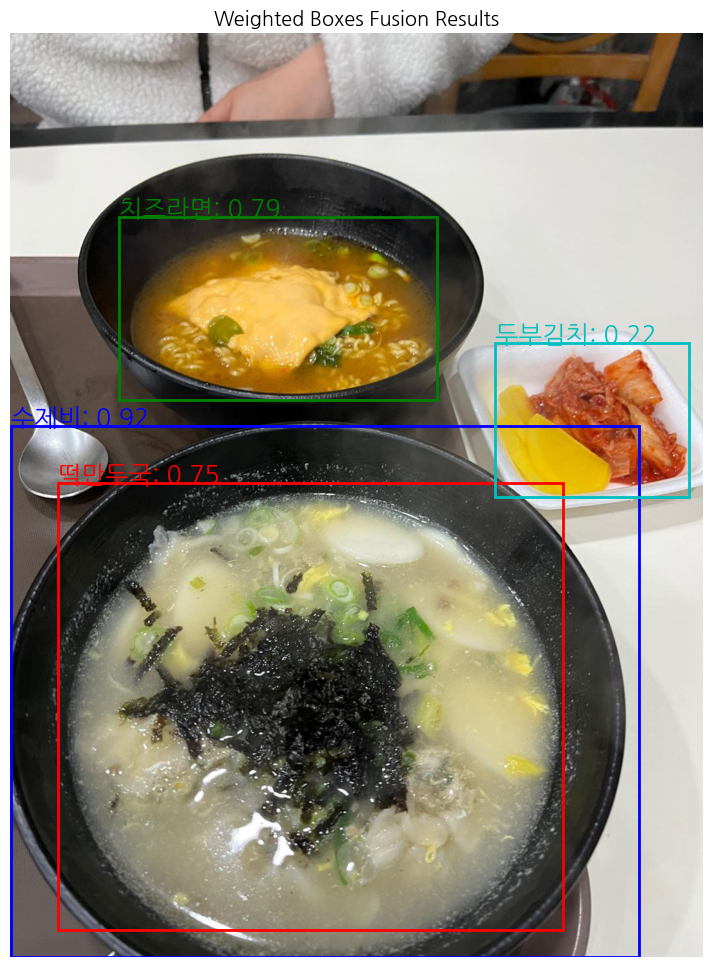

@@original_scale_wbf_boxes : [[0.0009787548333406448, 0.42469295859336853, 0.9069290161132812, 1.0], [0.1574074074074074, 0.1986111111111111, 0.6157407407407407, 0.3972222222222222], [0.06851851851851852, 0.48680555555555555, 0.7972222222222223, 0.9708333333333333], [0.6990740740740741, 0.3347222222222222, 0.9796296296296296, 0.5020833333333333]]


In [36]:
from ensemble_boxes import *
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from ultralytics import YOLO
from collections import defaultdict
import io
import torch

# Korean font and font size settings
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 12

# Initialize models
model_list = []
model_weights=[
    "../BP_OB_Model/runs/detect/train12/weights/best.pt",
    "../BP_OB_Model/runs/detect/train11/weights/best.pt",
    "../BP_OB_Model/runs/detect/train9/weights/best.pt",
    "../BP_OB_Model/runs/detect/train2/weights/best.pt",
    "../BP_OB_Model/runs/detect/train13/weights/best.pt"
    ]
for model_weight in model_weights:
    model_yolov = YOLO(model_weight)
    model_list.append(model_yolov)

boxes_list = []
scores_list = []
labels_list = []

# 초기 라벨 매핑 (이 예시에서는 비어있음)
label_mapping = {}
# kt 에서 찾은 음식이 이미 라벨링 되어 있을 경우를 상정
key_mapping = {}

# Image resizing and processing
img_path = "/data/BP/img_file/KakaoTalk_20240104_142643099.jpg"
resized_img_byte = img_resize(img_path)  # Ensure img_resize is correctly defined
print(type(resized_img_byte))
resized_img = Image.open(io.BytesIO(resized_img_byte))
img_width, img_height = resized_img.size
point_list = food_api(resized_img_byte)  # Ensure food_api is correctly defined

# Collect boxes, scores, and labels from each model
for model in model_list:
    result = model.predict(resized_img)
    print("@helloehllo",result)
    print(type(resized_img))
    boxes = result[0].boxes
    print("@hello-2",boxes)
    if len(boxes.conf) > 0:
        model_boxes = []
        model_scores = []
        model_labels = []
        for i, box in enumerate(boxes.xyxy):
            x_min, y_min, x_max, y_max = box
            conf = boxes.conf[i]
            cls_name = result[0].names[int(boxes.cls[i])]
            cls = int(boxes.cls[i])

            # 새로운 라벨을 매핑에 추가
            if cls_name not in label_mapping:
                label_mapping[cls] = cls_name
                key_mapping[cls_name] = cls

            model_boxes.append([x_min, y_min, x_max, y_max])
            model_scores.append(conf)
            model_labels.append(cls)
            
        boxes_list.append(model_boxes)
        scores_list.append(model_scores)
        labels_list.append(model_labels)
        print("@@@@ labels_list :",labels_list)

# Add labels from point_list to the mapping
additional_labels = 150  # Start number for labels added from food_api
api_model_boxes = []
api_model_scores = []
api_model_labels = []
for item in point_list:
    x_min, y_min, x_max, y_max, food_name, confidence = item
    if food_name not in key_mapping:
        label_mapping[additional_labels] = food_name
        api_model_labels.append(additional_labels)
        additional_labels += 1
    else:
        api_model_labels.append(key_mapping[food_name])
        additional_labels += 1
    # Add the box to the last model's list
    api_model_boxes.append([x_min, y_min, x_max, y_max])
    api_model_scores.append(confidence)
boxes_list.append(api_model_boxes)
scores_list.append(api_model_scores)
labels_list.append(api_model_labels)
print("@@@@ labels_list :",labels_list)

# Normalize box coordinates and ensure consistency
for i in range(len(boxes_list)):
    model_boxes = boxes_list[i]
    model_scores = scores_list[i]
    model_labels = labels_list[i]

    if len(model_boxes) != len(model_scores) or len(model_boxes) != len(model_labels):
        print(f"Error in model {i}: Length of boxes, scores, and labels do not match.")
        print(f"Boxes: {len(model_boxes)}, Scores: {len(model_scores)}, Labels: {len(model_labels)}")
        continue

    # Normalize boxes and move to CPU if necessary
    normalized_boxes = []
    for box in model_boxes:
        box = [b.cpu() if isinstance(b, torch.Tensor) else b for b in box]  # Move to CPU if tensor
        x_min, y_min, x_max, y_max = box
        normalized_boxes.append([x_min / img_width, y_min / img_height, x_max / img_width, y_max / img_height])
    boxes_list[i] = normalized_boxes

# Apply Weighted Boxes Fusion
try:
    wbf_boxes, wbf_scores, wbf_labels = weighted_boxes_fusion(
        boxes_list, scores_list, labels_list, iou_thr=0.55, skip_box_thr=0.20, conf_type='max'
    )
    print('===='*20)
    print("@@@@ wbf_boxes :",wbf_boxes)
    print('===='*20)
    print('@@@@ wbf_scores :',wbf_scores)
    print('===='*20)
    print("@@@@ wbf_labels :",wbf_labels)
    try:
        pred_list = []
        _, wbf_scores, wbf_labels = weighted_boxes_fusion(
            boxes_list, scores_list, labels_list, iou_thr=0.55, skip_box_thr=0.20, conf_type='max'
        )
        for index, scores in enumerate(wbf_scores):
            if scores >= 0.4:
                pred_list.append(label_mapping[wbf_labels[index]])
        print(point_list,"\n",pred_list)
    except Exception as e:
        print("Error during Weighted Boxes Fusion:", e)
except Exception as e:
    print("Error during Weighted Boxes Fusion:", e)

all_boxes = [box for model_boxes in boxes_list for box in model_boxes]

# Image drawing function
def draw_boxes_on_image_plt(image, boxes, labels, colors, title):
    plt.figure(figsize=(12, 12))
    plt.imshow(image)

    for i, box in enumerate(boxes):
        print("@@@box :",i)
        # Scale box coordinates to image dimensions and ensure they are within the image boundaries
        scaled_box = [max(min(box[0] * img_width, img_width), 0),
                      max(min(box[1] * img_height, img_height), 0),
                      max(min(box[2] * img_width, img_width), 0),
                      max(min(box[3] * img_height, img_height), 0)]
        rect = patches.Rectangle((scaled_box[0], scaled_box[1]), scaled_box[2] - scaled_box[0], scaled_box[3] - scaled_box[1], linewidth=2, edgecolor=colors[i % len(colors)], facecolor='none')
        plt.gca().add_patch(rect)
        plt.text(scaled_box[0], scaled_box[1], labels[i], color=colors[i % len(colors)], fontsize=18)

    plt.title(title)
    plt.axis('off')
    plt.show()

# Prepare labels for combined and WBF results

print("@@@ label_mapping :",label_mapping)
print("@@@@ labels_list :",labels_list)
all_labels_with_scores = []
for model_labels, model_scores in zip(labels_list, scores_list):
    for label_id, score in zip(model_labels, model_scores):
        label_name = next((name for id_,name in label_mapping.items() if id_ == label_id), 'Unknown')
        all_labels_with_scores.append(f"{label_name}: {score:.2f}")


# Convert WBF boxes back to original scale
original_scale_wbf_boxes = [[box[0], box[1], box[2], box[3]] for box in wbf_boxes]

# Prepare labels for WBF results
wbf_labels_with_names = [f"{label_mapping.get(label_id, 'Unknown')}: {score:.2f}" for label_id , score in zip(wbf_labels, wbf_scores)]

# Draw all boxes from different models on the same image
colors = ['b', 'g', 'r', 'c', 'm', 'y']  # Color list
print("@@@@all_labels_with_scores : ",all_labels_with_scores)
draw_boxes_on_image_plt(resized_img, all_boxes, all_labels_with_scores, colors, "Combined Model Detections")
print("@@@all_boxes :",all_boxes)
# Draw WBF results
draw_boxes_on_image_plt(resized_img, original_scale_wbf_boxes, wbf_labels_with_names, colors, "Weighted Boxes Fusion Results")
print("@@original_scale_wbf_boxes :",original_scale_wbf_boxes)
# Final check for any inconsistency in lists
for i in range(len(boxes_list)):
    if len(boxes_list[i]) != len(scores_list[i]) or len(boxes_list[i]) != len(labels_list[i]):
        print(f"Error in final lists {i}: Length of boxes, scores, and labels do not match.")
        print(f"Boxes: {len(boxes_list[i])}, Scores: {len(scores_list[i])}, Labels: {len(labels_list[i])}")

@hello14 : 600 337
@hello14 : 720 1080 2560 1440
@hello15 : Resized Image Size: 1923 1080
-------------- <class 'bytes'>
Code: 200
{'confidence': 0.3213976, 'food_name': '갈비탕', 'food_code': 'D018053', 'food_cal': 363.24, 'food_nat': 1330.59, 'food_serving_size': 670.0, 'food_carbs': 2.68, 'food_protein': 57.0, 'food_fat': 13.83, 'food_sugar': 0.77, 'food_cholesterol': 210.78}
[[597, 471, 1155, 845, '갈비탕', 0.3213976]]

0: 256x416 1 갈비탕, 7.7ms
Speed: 0.6ms preprocess, 7.7ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 (no detections), 5.6ms
Speed: 0.5ms preprocess, 5.6ms inference, 0.3ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 (no detections), 5.6ms
Speed: 0.5ms preprocess, 5.6ms inference, 0.3ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 (no detections), 3.9ms
Speed: 0.5ms preprocess, 3.9ms inference, 0.3ms postprocess per image at shape (1, 3, 256, 416)
@@ here {'갈비탕': 0}


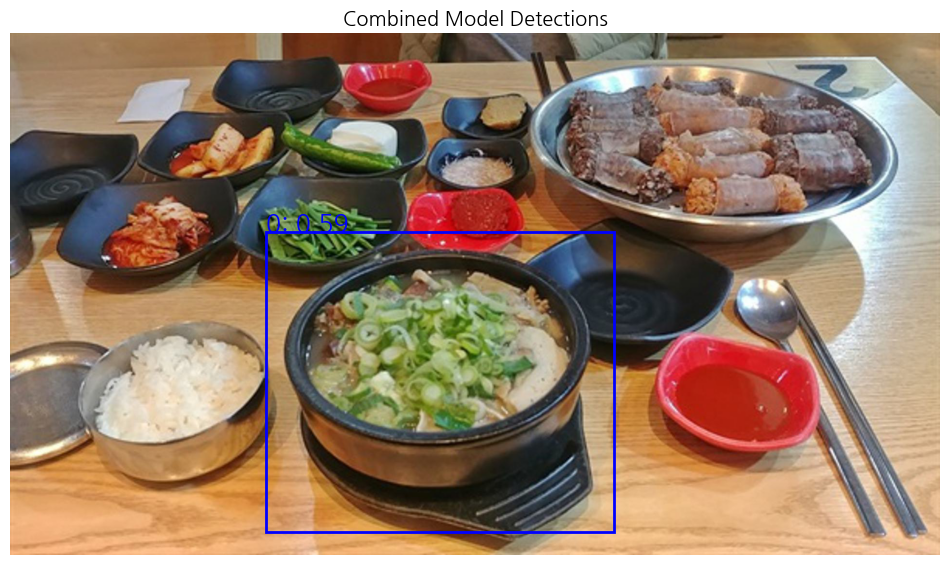

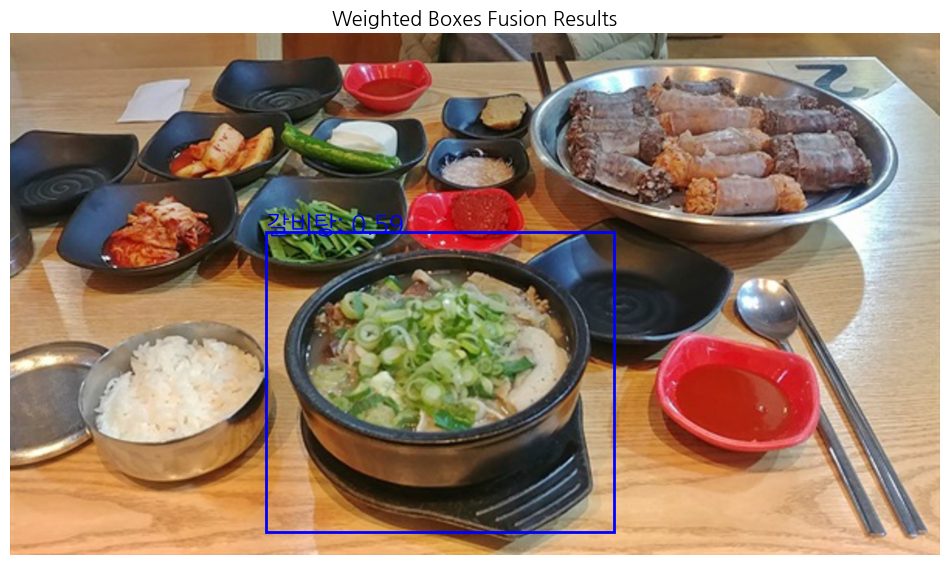

In [34]:
from ensemble_boxes import *
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from ultralytics import YOLO

# 한글 폰트 및 폰트 크기 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 12

# 모델 초기화
model_yolov5l = YOLO("../BP_OB_Model/runs/detect/train12/weights/best.pt")
model_yolov5mu = YOLO("../BP_OB_Model/runs/detect/train11/weights/best.pt")
model_yolov5l2 = YOLO("../BP_OB_Model/runs/detect/train13/weights/best.pt")
model_yolov8n = YOLO("../BP_OB_Model/runs/detect/train2/weights/best.pt")
model_list = [model_yolov5l, model_yolov5mu, model_yolov5l2, model_yolov8n]

boxes_list = []
scores_list = []
labels_list = []

# 이미지 리사이징
img_path ="/data/BP/img_file/Test_gokbob.jpg"
resized_img_byte = img_resize(img_path)
resized_img = Image.open(io.BytesIO(resized_img_byte))
# 초기 라벨 매핑 (이 예시에서는 비어있음)
label_mapping = {}

# 라벨 ID 할당을 위한 변수
next_label_id = 0

point_list = food_api(resized_img_byte)

# Collect boxes, scores, and labels from each model
for model in model_list:
    result = model.predict(resized_img)
    boxes = result[0].boxes
    if len(boxes.conf) > 0:
        model_boxes = []
        model_scores = []
        model_labels = []
        for i, box in enumerate(boxes.xyxy):
            x_min, y_min, x_max, y_max = box
            conf = boxes.conf[i]
            cls_name = result[0].names[int(boxes.cls[i])]
            
            # 새로운 라벨을 매핑에 추가
            if cls_name not in label_mapping:
                label_mapping[cls_name] = next_label_id
                next_label_id += 1

            cls_id = label_mapping[cls_name]
            model_boxes.append([x_min, y_min, x_max, y_max])
            model_scores.append(conf)
            model_labels.append(cls_id)

        boxes_list.append(model_boxes)
        scores_list.append(model_scores)
        labels_list.append(model_labels)

print("@@ here",label_mapping)

# Apply Weighted Boxes Fusion
if boxes_list:
    img_width, img_height = resized_img.size
    for model_index in range(len(boxes_list)):
        for box_index in range(len(boxes_list[model_index])):
            box = boxes_list[model_index][box_index]
            # Normalize the box coordinates
            normalized_box = [
                float(box[0]) / img_width,  # Normalize x_min
                float(box[1]) / img_height, # Normalize y_min
                float(box[2]) / img_width,  # Normalize x_max
                float(box[3]) / img_height  # Normalize y_max
            ]
            # Replace the original box with the normalized box
            boxes_list[model_index][box_index] = normalized_box

    wbf_boxes, wbf_scores, wbf_labels = weighted_boxes_fusion(
        boxes_list, scores_list, labels_list, iou_thr=0.55, skip_box_thr=0.35, conf_type='avg'
    )

# 이미지를 그리기 위한 함수
# 이미지를 그리기 위한 함수
def draw_boxes_on_image_plt(resized_img, boxes, labels, scores, colors, title):
    # 이미지 복사
    # image = Image.open(img_path)
    img_copy = resized_img.copy()
    plt.figure(figsize=(12, 12))
    plt.imshow(img_copy)

    # 각 박스와 레이블을 이미지에 그리기
    for i, box in enumerate(boxes):
        rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], linewidth=2, edgecolor=colors[i % len(colors)], facecolor='none')
        plt.gca().add_patch(rect)

        # 레이블 ID를 레이블 이름으로 변환
        label_name = labels[i] if i < len(labels) else 'Unknown'
        plt.text(box[0], box[1], f"{label_name}: {scores[i]:.2f}", color=colors[i % len(colors)], fontsize=18)
        
    plt.title(title)
    plt.axis('off')
    plt.show()

# Aggregate boxes, labels, and scores from all models
all_boxes = []
all_labels = []
all_scores = [] # 점수를 저장할 리스트 추가
for i, model_boxes in enumerate(boxes_list):
    for j, box in enumerate(model_boxes):
        label_id = labels_list[i][j]
        score = scores_list[i][j]
        all_labels.append(label_id)
        all_scores.append(score) # 점수 추가
        # Convert normalized boxes back to original scale
        original_scale_box = [box[0] * img_width, box[1] * img_height, box[2] * img_width, box[3] * img_height]
        all_boxes.append(original_scale_box)

# Draw all boxes from different models on the same image
colors = ['b', 'g', 'r', 'c', 'm', 'y']  # 색상 목록
draw_boxes_on_image_plt(resized_img, all_boxes, all_labels, all_scores, colors, "Combined Model Detections")

# Prepare labels for WBF results
wbf_labels_with_names = []
for label in wbf_labels:
    # label_mapping에서 레이블 ID에 해당하는 이름 찾기
    label_name = next((name for name, id in label_mapping.items() if id == label), None)
    if label_name is not None:
        wbf_labels_with_names.append(label_name)
    else:
        # 매핑되지 않은 레이블 ID에 대한 처리 (예: 'Unknown'으로 처리)
        wbf_labels_with_names.append('Unknown')

# Convert wbf_boxes back to original scale and draw them
original_scale_wbf_boxes = [[box[0] * img_width, box[1] * img_height, box[2] * img_width, box[3] * img_height] for box in wbf_boxes]
draw_boxes_on_image_plt(resized_img, original_scale_wbf_boxes, wbf_labels_with_names, wbf_scores, colors, "Weighted Boxes Fusion Results")

In [ ]:
model = YOLO("../weights/yolov8m_train.pt")

# @app.route('/predict', methods=['POST'])
# def predict():
#     if request.method == 'POST':
#         file = request.files['food_image']
#         print("files-type",file)
#         img = file.read()
#         res = {
#             # 0 : OCR , 1 : KT & OD
#             "inferResult": 0,
#             # mealType 
#             "mealType" : "",
#             # image beatmap
#             #dayTime send
#             "dayTime" : "",
#             # predict Result
#             "predict": {
#                 # predict food name
#                 "foodNames": [],
#                 # kt predict food info
#                 "ktFoodsInfo": {} 
#             },
#             # "image":[file]
#         }
        
#         # API키 연결 .json 파일
#         # =====================================================
#         secret_file = "secrets.json"
#         # ====================================================
#         print("@hello2")
#         try:
#             print("@helloimg",type(img))
#             resized_img = img_resize(img)
#             ocr_result = OCR_api(img, secret_file)
#             print("@hello10 :",ocr_result)
#             print("@hello3")
#             if (ocr_result['images'][0]['inferResult'] == 'ERROR') or (len(ocr_result['images'][0]['receipt']['result']['subResults']) == 0):
#                 print("@hello6",ocr_result['images'][0]['inferResult'] )
#                 print('@hello7')
#                 food_result = food_api(resized_img, secret_file)
#                 od_result = get_prediction(img)
#                 print("@hello15 : plz change to comment")
#                 print('+++'*20)
#                 print(food_result)
#                 print("+++"*20)
#                 print(od_result)
#                 print('+++'*20)
#                 res['inferResult'] = 1
#                 # print("@hello3")
#                 # print("="*20)
#                 # print(food_result)
#                 # print("="*20)
#                 for region_num in food_result[0]:
#                     # res['predict']['ktFoodsInfo'][region_num] = food_result[0][region_num]['prediction_top1']
#                     # res['predict']['foodNames'].append(food_result[0][region_num]['prediction_top1']["food_name"])
#                     if food_result[0][region_num]['prediction_top1']['confidence'] >=0.35:
#                         res['predict']['ktFoodsInfo'][region_num] = food_result[0][region_num]['prediction_top1']
#                         res['predict']['foodNames'].append(food_result[0][region_num]['prediction_top1']["food_name"])

#                 for item in od_result:
#                     # res['predict']['foodNames'].append(od_result[item]['Food_name'])
#                     if od_result[item]['highest_confidence'] >=0.75:
#                         if od_result[item]['Food_name'] not in res['predict']['foodNames']:
#                             res['predict']['foodNames'].append(od_result[item]['Food_name'])
#             else:
#                 # print('@hello4')
#                 for field in ocr_result['images'][0]['receipt']['result']['subResults'][0]['items']:
#                     if field['name']['text'] not in res['predict']['foodNames']:
#                         res['predict']['foodNames'].append(field['name']['text'])

#             with open(f"../result.json", 'w', encoding='utf-8') as f:
#                 json.dump(res, f, ensure_ascii=False, indent=4)

#             print("JSON file has been saved.")
#         except Exception as error:
#             print("Error:", error)
            
#         # 주의!! #
#         # jsonify를 사용하면 json.dump()와 똑같이 ascii 인코딩을 사용하기 때문에 한글 깨짐
#         # return jsonify({'class_id': class_id, 'class_name': class_name})
        
#         print(res)
#         res = make_response(json.dumps(res, ensure_ascii=False))
#         res.headers['Content-Type'] = 'application/json'
#         return res

In [ ]:
# def img_resize(img):
#     try:
#         # 이미지를 열고 크기 가져오기
#         with Image.open(io.BytesIO(img)) as img:
#             width, height = img.size
#             print("@hello14 :", width, height)

#             # 최소 및 최대 크기 정의
#             minWidth, maxWidth = (720, 2560) if width > height else (720, 1440)
#             minHeight, maxHeight = (1080, 1440) if width > height else (1080, 2560)
#             print("@hello14 :", minWidth, minHeight, maxWidth, maxHeight)

#             if minWidth <= width <= maxWidth and minHeight <= height <= maxHeight:
#                 print("Image meets size requirements. No resizing needed.")
#                 img_byte_arr = io.BytesIO()
#                 img.save(img_byte_arr, format='JPEG')
#                 return img_byte_arr.getvalue()

#             # 이미지 크기 조정
#             newWidth, newHeight = width, height
#             if width < minWidth or height < minHeight:
#                 # 이미지 확대
#                 if width / height > 1:
#                     # 넓은 이미지
#                     newHeight = max(height, minHeight)
#                     newWidth = round(newHeight * (width / height))
#                     if newWidth < minWidth:
#                         newWidth = minWidth
#                         newHeight = round(newWidth / (width / height))
#                 else:
#                     # 높은 이미지
#                     newWidth = max(width, minWidth)
#                     newHeight = round(newWidth / (width / height))
#                     if newHeight < minHeight:
#                         newHeight = minHeight
#                         newWidth = round(newHeight * (width / height))
#             elif width > maxWidth or height > maxHeight:
#                 # 이미지 축소
#                 if width / height > 1:
#                     # 넓은 이미지
#                     newWidth = min(width, maxWidth)
#                     newHeight = round(newWidth / (width / height))
#                     if newHeight > maxHeight:
#                         newHeight = maxHeight
#                         newWidth = round(newHeight * (width / height))
#                 else:
#                     # 높은 이미지
#                     newHeight = min(height, maxHeight)
#                     newWidth = round(newHeight / (width / height))
#                     if newWidth > maxWidth:
#                         newWidth = maxWidth
#                         newHeight = round(newWidth / (width / height))

#             # 조정된 크기 출력 및 이미지 크기 조정
#             print("@hello15 : Resized Image Size:", newWidth, newHeight)
#             resized_img = img.resize((newWidth, newHeight))
#             img_byte_arr = io.BytesIO()
#             resized_img.save(img_byte_arr, format='JPEG')
#             return img_byte_arr.getvalue()
#     except Exception as error:
#         print("Error resizing image:", error)
#         return None